### An Neural Network  is an interconnected group of nodes, which process data similar to the our brain network.

### Artificial neural network (ANN) is inspired by the human neural network architecture. The simplest neural network consists of only one neuron and is called a perceptron

### An Artificial Neural Network (ANN) is a computational model that is inspired by the way biological neural networks in the human brain process information.

- The basic unit of computation in a neural network is the neuron, often called a node or unit. 


- It receives input from some other nodes, or from an external source and computes an output.


- Each input has an associated weight (w), which is assigned on the basis of its relative
  importance to other inputs.


- The node applies a function f  to the weighted sum of its inputs 

### Single-layer Neural Network (Perceptron)

#### The Perceptron algorithm is the simplest type of artificial neural network, it is inspired by the information processing of a single neural cell called a neuron.

<img src='images/perceptron-picture.png' width='60%'/>

A perceptron has a input layer and a neuron. Input layer is responsible for receiving the inputs.

Each input is multiplied with a weight  and the results are added together.


The sum is then passed through an activation function.


Activation Function(may be a non-linear function) takes the sum of weighted input (w1*x1 + w2*x2 + w3*x3 + 1*b) as an argument and return the output of the neuron. 

### Activation Functions

### 1:Sigmoid or Logistic Function

It exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output.

<img src="images/sig.PNG" width='40%'/>

### Tanh or hyperbolic tangent Activation Function

- tanh is also like logistic sigmoid but range of the tanh function is from (-1 to 1).

<img src="images/tanh.png" width='50%'/>

<img src="images/tan.PNG" width='50%'/>

### ReLU function :Rectified linear unit

- Most widely used activation function.


-  It gives an output x if x is positive and 0 otherwise.

<img src="images/relu.png" width='80%'/>

### Implementing Perceptron in scikit-learn

In [1]:
from sklearn.datasets import load_iris,load_digits
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata('MNIST Original')

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [ ]:
#iris= load_iris()

In [4]:
X=mnist.data
y=mnist.target

In [5]:
import matplotlib.pyplot as plt

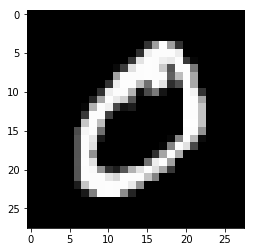

In [7]:
plt.imshow(X[0].reshape(28,28),cmap='gray')
plt.show()

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=10000,random_state=10)

In [9]:
## scale the data

sc= StandardScaler()

In [12]:
X_train_scd= sc.fit_transform(X_train.astype('float32'))
X_test_scd = sc.transform(X_test.astype('float32'))

In [30]:
### implement perceptron

#eta0:learning rate

#Learning Rate: Used to limit the amount each weight is corrected each 
#time it is updated.
    
#n_iter:(#Epochs): The number of times to run through the training data 
#while updating the weight.

ptron = Perceptron(penalty='l1',max_iter=40,eta0=.001,random_state=10,verbose=0)

In [31]:
ptron.fit(X_train_scd,y_train,)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.001, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty='l1', random_state=10,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [32]:
pred = ptron.predict(X_test_scd)

In [33]:
accuracy_score(y_test,pred)

0.8814

In [34]:
ptron.score(X_train_scd,y_train)

0.8890166666666667

## Multilayer Perceptron

The multilayer perceptron (MLP) 

- is a feedforward artificial neural network model that maps sets of input
  data onto a set of appropriate outputs.
  
  
- consists of multiple layers 
  an input and an output layer with one or more hidden layers


- the input layer, consists of a set of features.


- Each neuron in the hidden layer transforms the values from the previous layer with a weighted linear summation w_1x_1 + w_2x_2 + ... + w_mx_m, followed by a non-linear activation function..


- The output layer receives the values from the last hidden layer and
  transforms them into output values.


- MLPs are fully connected, each node in one layer connects with a certain
  weight to every node in the following layer.


-  The nodes of the layers are neurons using nonlinear activation functions, except for the nodes of the input layer. 


- There can be one or more non-linear hidden layers between the input and the output layer.

<img src="images/mlp.png" width="80%"/>

In [35]:
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier

from sklearn.linear_model import Perceptron

In [36]:
digits = load_digits()

In [39]:
X = mnist.data
y = mnist.target

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=10000,random_state=0)

In [ ]:
#X_train , X_test = X[:1700],X[1700:]
#y_train ,y_test = y[:1700],y[1700:]

In [48]:
#mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
 #                    solver='sgd', verbose=10, tol=1e-4, random_state=1)
#mlp = MLPClassifier()

mlp = MLPClassifier(hidden_layer_sizes=(100,100),max_iter=100,
                    solver='sgd',random_state=1)

In [49]:
mlp.fit(X_train, y_train)

C:\Anaconda3\envs\py27\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [50]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.967600
Test set score: 0.941200


In [ ]:
X.shape

In [8]:
from sklearn.datasets import fetch_mldata
from sklearn.preprocessing import StandardScaler
import numpy as np

In [3]:
digit_mnist = fetch_mldata('MNIST Original')

In [4]:
digit_mnist.data.shape

(70000L, 784L)

In [9]:
# rescale the data, use the traditional train/test split
X, y = digit_mnist.data ,digit_mnist.target


X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

sc=StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float64))
X_test = sc.transform(X_test.astype(np.float64))

In [17]:
mlp = MLPClassifier(activation='relu',hidden_layer_sizes=(200,200,200),verbose=True,max_iter=40
                    ,solver='sgd',random_state=1,tol=.001)


In [18]:
mlp.fit(X_train,y_train)

Iteration 1, loss = 1.20645138
Iteration 2, loss = 0.43811412
Iteration 3, loss = 0.31375611
Iteration 4, loss = 0.26071246
Iteration 5, loss = 0.22808474
Iteration 6, loss = 0.20491493
Iteration 7, loss = 0.18753617
Iteration 8, loss = 0.17326102
Iteration 9, loss = 0.16128231
Iteration 10, loss = 0.15100584
Iteration 11, loss = 0.14203108
Iteration 12, loss = 0.13428984
Iteration 13, loss = 0.12701207
Iteration 14, loss = 0.12070978
Iteration 15, loss = 0.11477579
Iteration 16, loss = 0.10937696
Iteration 17, loss = 0.10443184
Iteration 18, loss = 0.09971590
Iteration 19, loss = 0.09551222
Iteration 20, loss = 0.09121992
Iteration 21, loss = 0.08746825
Iteration 22, loss = 0.08407514
Iteration 23, loss = 0.08061840
Iteration 24, loss = 0.07753514
Iteration 25, loss = 0.07456655
Iteration 26, loss = 0.07159280
Iteration 27, loss = 0.06898285
Iteration 28, loss = 0.06632191
Iteration 29, loss = 0.06387395
Iteration 30, loss = 0.06158824
Iteration 31, loss = 0.05938274
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200, 200, 200), learning_rate='constant',
       learning_rate_init=0.001, max_iter=40, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.001, validation_fraction=0.1, verbose=True,
       warm_start=False)

In [14]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.961517
Test set score: 0.950200


In [ ]:
mlp.loss_curve_

In [19]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.990000
Test set score: 0.968100
